<a href="https://colab.research.google.com/github/MAristyaP/PCVK_Genap_2021/blob/main/ProjectPCVK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import zipfile, imutils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib
from sklearn.metrics import classification_report
from imutils.contours import sort_contours
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Kaggle A-Z

In [4]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-18 11:34:29--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip.2’

alfabeto_A-Z.zip.2  100%[===================>] 184.67M   176MB/s    in 1.0s    

2023-12-18 11:34:31 (176 MB/s) - ‘alfabeto_A-Z.zip.2’ saved [193643888/193643888]



In [5]:
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [6]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
alphabet_data = dataset_az.drop('0', axis=1)
alphabet_labels = dataset_az['0']

In [8]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [9]:
alphabet_labels.shape

(372450,)

In [10]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
alphabet_data.shape

(372450, 28, 28)

Text(0.5, 1.0, 'Class: 13.0')

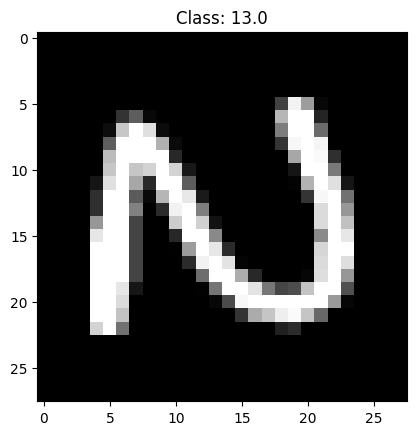

In [11]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]))

MNIST

In [13]:
from tensorflow.keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [14]:
digits_data.shape

(70000, 28, 28)

Text(0.5, 1.0, 'Class: 9')

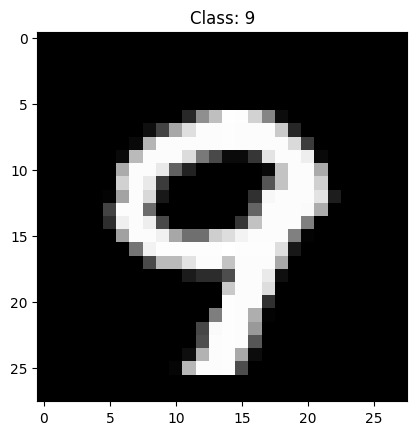

In [15]:
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

Combine Dataset (MNIST + Kaggel A-Z)

In [16]:
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [18]:
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [19]:
alphabet_labels += 10

In [20]:
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [21]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [22]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [23]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [24]:
data = np.array(data, dtype = 'float32')

In [25]:
data = np.expand_dims(data, axis=-1)

data.shape

(442450, 28, 28, 1)

Preprocessing

In [26]:
data /= 255.0

In [27]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

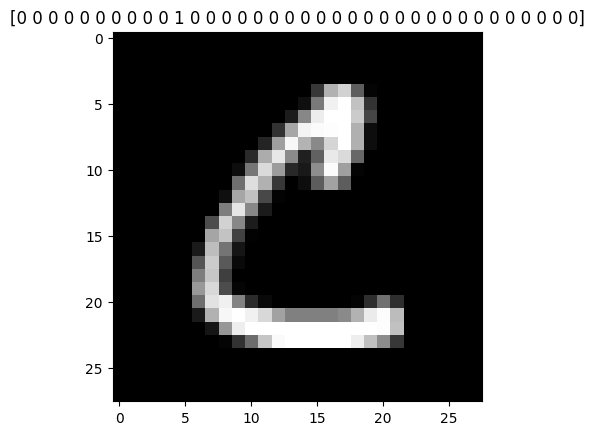

In [28]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [29]:
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [30]:
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [32]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

Build CNN Model

In [33]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

# output
model.add(Dense(36, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [34]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [35]:
import joblib

joblib.dump(name_labels, "labels.pkl")

['labels.pkl']

In [36]:
a = joblib.load("labels.pkl")
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


Train model

In [37]:
file_model = 'manual_ocr.model'
epochs = 20
batch_size = 128

In [38]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [39]:
history = model.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2919 - accuracy: 0.8190
Epoch 1: val_loss improved from inf to 0.31417, saving model to manual_ocr.model
2765/2765 [==============================] - 143s 49ms/step - loss: 2.2919 - accuracy: 0.8190 - val_loss: 0.3142 - val_accuracy: 0.8642
Epoch 2/20
2765/2765 [==============================] - ETA: 0s - loss: 1.0304 - accuracy: 0.8985
Epoch 2: val_loss improved from 0.31417 to 0.18928, saving model to manual_ocr.model
2765/2765 [==============================] - 121s 44ms/step - loss: 1.0304 - accuracy: 0.8985 - val_loss: 0.1893 - val_accuracy: 0.9330
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8468 - accuracy: 0.9112
Epoch 3: val_loss did not improve from 0.18928
2765/2765 [==============================] - 131s 47ms/step - loss: 0.8468 - accuracy: 0.9112 - val_loss: 0.2201 - val_accuracy: 0.9174
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.7480 - accu

In [40]:
predictions = model.predict(X_test, batch_size=batch_size)

# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[10]

692/692 [==============================] - 2s 2ms/step


array([7.41896474e-06, 6.19362783e-09, 6.69434087e-07, 2.14109969e-05,
       2.42106836e-07, 3.69819775e-02, 1.28875210e-04, 1.46791940e-10,
       4.47251077e-05, 1.83820903e-05, 1.52475200e-12, 6.74203147e-06,
       1.74592412e-08, 8.09997982e-06, 1.21987265e-08, 8.44575077e-09,
       4.77605412e-04, 1.72745568e-10, 1.19863266e-12, 9.65794316e-05,
       5.37639755e-09, 1.46932431e-08, 2.59301669e-09, 5.51346986e-08,
       5.04683294e-06, 2.27274336e-06, 6.18019567e-06, 5.10886500e-10,
       9.62188780e-01, 3.50204843e-08, 3.20854360e-06, 2.09456757e-10,
       9.62198669e-07, 1.95390867e-14, 5.87832574e-07, 4.74129145e-08],
      dtype=float32)

In [41]:
name_labels[np.argmax(predictions[10])]

'S'

In [42]:
np.argmax(y_test[10]) == np.argmax(predictions[10])

True

In [43]:
model.evaluate(X_test, y_test)

2766/2766 [==============================] - 8s 3ms/step - loss: 0.1769 - accuracy: 0.9366


[0.17693868279457092, 0.9366030097007751]

In [44]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.32      0.75      0.45      1381
           1       0.95      0.99      0.97      1575
           2       0.88      0.97      0.93      1398
           3       0.90      1.00      0.95      1428
           4       0.83      0.98      0.90      1365
           5       0.57      0.95      0.71      1263
           6       0.93      0.98      0.96      1375
           7       0.94      0.99      0.96      1459
           8       0.89      0.99      0.94      1365
           9       0.96      0.98      0.97      1392
           A       1.00      0.98      0.99      2774
           B       0.97      0.97      0.97      1734
           C       0.98      0.99      0.99      4682
           D       0.89      0.97      0.93      2027
           E       1.00      0.95      0.97      2288
           F       0.97      1.00      0.99       233
           G       0.97      0.91      0.94      1152
           H       0.98    

In [45]:
model.save('model', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
save_path="/content/drive/MyDrive"
model.save(save_path)

Preprocessing Function

In [336]:
load_network = load_model('/content/model')

In [337]:
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [338]:
def stackImages(imgArray,scale,lables=[]):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
            hor_con[x] = np.concatenate(imgArray[x])
        ver = np.vstack(hor)
        ver_con = np.concatenate(hor)
    else:
        for x in range(0, rows):
            imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        hor_con= np.concatenate(imgArray)
        ver = hor
    if len(lables) != 0:
        eachImgWidth= int(ver.shape[1] / cols)
        eachImgHeight = int(ver.shape[0] / rows)
        print(eachImgHeight)
        for d in range(0, rows):
            for c in range (0,cols):
                cv2.rectangle(ver,(c*eachImgWidth,eachImgHeight*d),(c*eachImgWidth+len(lables[d])*13+27,30+eachImgHeight*d),(255,255,255),cv2.FILLED)
                cv2.putText(ver,lables[d],(eachImgWidth*c+10,eachImgHeight*d+20),cv2.FONT_HERSHEY_COMPLEX,0.7,(255,0,255),2)
    return ver

def reorder(myPoints):

    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)

    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] =myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] =myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]

    return myPointsNew


def biggestContour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 5000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest,max_area
def drawRectangle(img,biggest,thickness):
    cv2.line(img, (biggest[0][0][0], biggest[0][0][1]), (biggest[1][0][0], biggest[1][0][1]), (0, 255, 0), thickness)
    cv2.line(img, (biggest[0][0][0], biggest[0][0][1]), (biggest[2][0][0], biggest[2][0][1]), (0, 255, 0), thickness)
    cv2.line(img, (biggest[3][0][0], biggest[3][0][1]), (biggest[2][0][0], biggest[2][0][1]), (0, 255, 0), thickness)
    cv2.line(img, (biggest[3][0][0], biggest[3][0][1]), (biggest[1][0][0], biggest[1][0][1]), (0, 255, 0), thickness)

    return img

def nothing(x):
    pass

In [339]:
def preprocessing(img):
  heightImg = 480
  widthImg  = 640
  img = cv2.resize(img, (widthImg, heightImg)) # RESIZE IMAGE
  imgBlank = np.zeros((heightImg,widthImg, 3), np.uint8) # CREATE A BLANK IMAGE FOR TESTING DEBUGING IF REQUIRED
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # CONVERT IMAGE TO GRAY SCALE
  imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADD GAUSSIAN BLUR

  imgThreshold = cv2.Canny(imgBlur, 50, 150) # APPLY CANNY BLUR
  kernel = np.ones((5, 5))
  imgDial = cv2.dilate(imgThreshold, kernel, iterations=2) # APPLY DILATION
  imgThreshold = cv2.erode(imgDial, kernel, iterations=1)  # APPLY EROSION

  ## FIND ALL COUNTOURS
  imgContours = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
  imgBigContour = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
  contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # FIND ALL CONTOURS
  cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS

  # FIND THE BIGGEST COUNTOUR
  biggest, maxArea = biggestContour(contours) # FIND THE BIGGEST CONTOUR
  if biggest.size != 0:
    biggest = reorder(biggest)
    cv2.drawContours(imgBigContour, biggest, -1, (0, 255, 0), 20) # DRAW THE BIGGEST CONTOUR
    imgBigContour = drawRectangle(imgBigContour,biggest,2)
    pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
    pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))

    #REMOVE 20 PIXELS FORM EACH SIDE
    imgWarpColored=imgWarpColored[20:imgWarpColored.shape[0] - 20, 20:imgWarpColored.shape[1] - 20]
    imgWarpColored = cv2.resize(imgWarpColored,(widthImg,heightImg))

    # APPLY ADAPTIVE THRESHOLD
    imgWarpGray = cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
    imgAdaptiveThre = cv2.adaptiveThreshold(imgWarpGray, 255, 1, 1, 7, 2)
    imgAdaptiveThre = cv2.bitwise_not(imgAdaptiveThre)
    imgAdaptiveThre = cv2.medianBlur(imgAdaptiveThre,3)

    # Image Array for Display
    # imageArray = ([img,imgGray,imgThreshold,imgContours],
    #   [imgBigContour,imgWarpColored, imgWarpGray,imgAdaptiveThre])

    return imgAdaptiveThre

  else:
    # imageArray = ([img,imgGray,imgThreshold,imgContours],
    #   [imgBlank, imgBlank, imgBlank, imgBlank])

    return imgContours

In [211]:
pip install opencv-python


In [213]:
import cv2

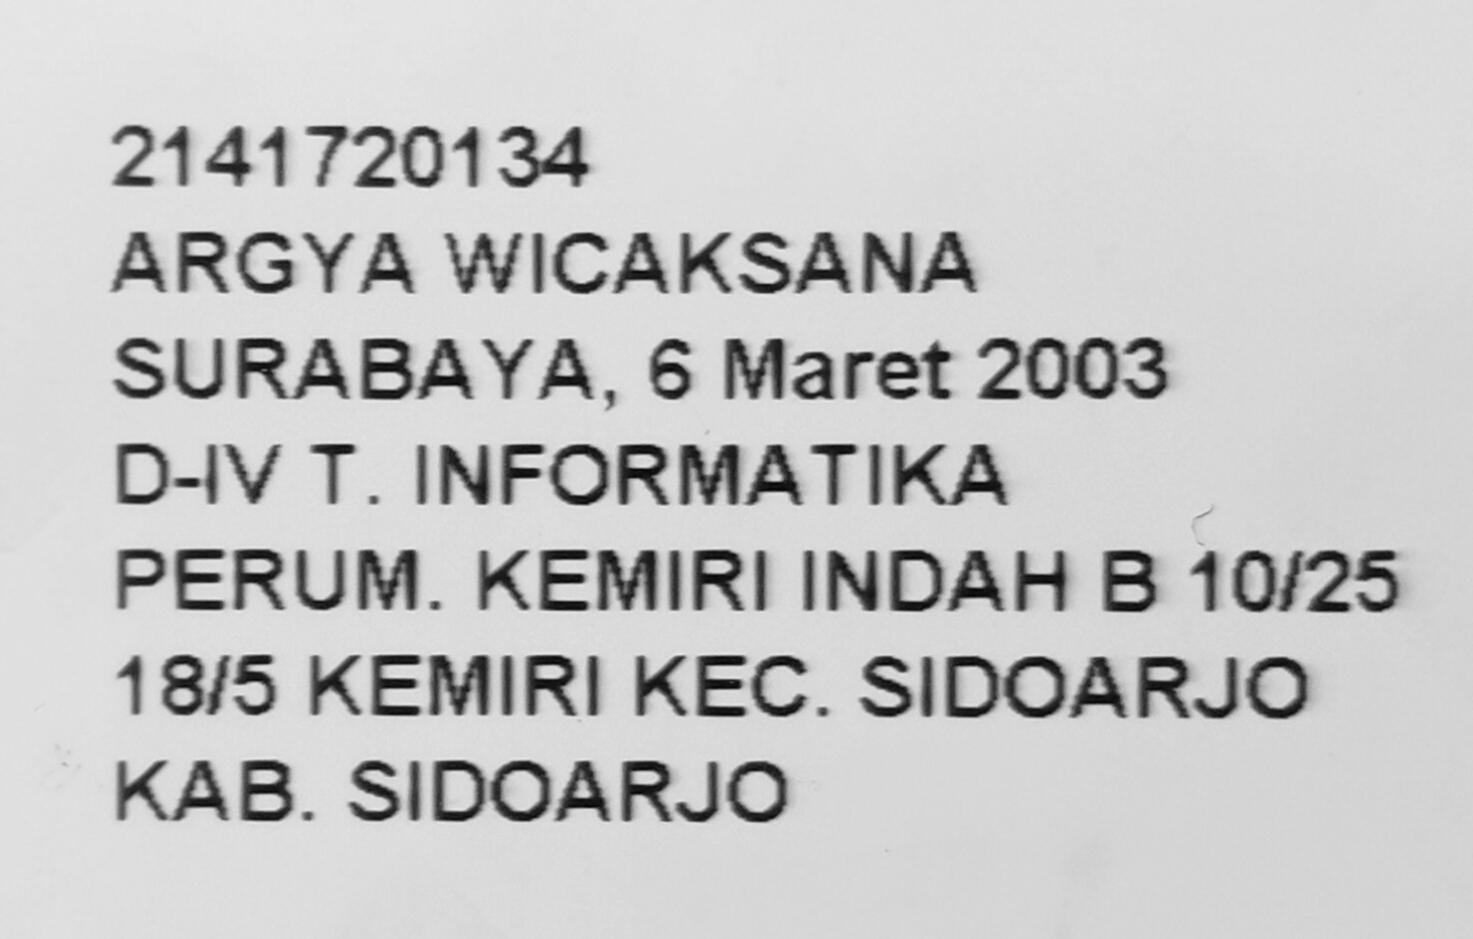

In [297]:
img = cv2.imread('/content/download.png')

cv2_imshow(img)

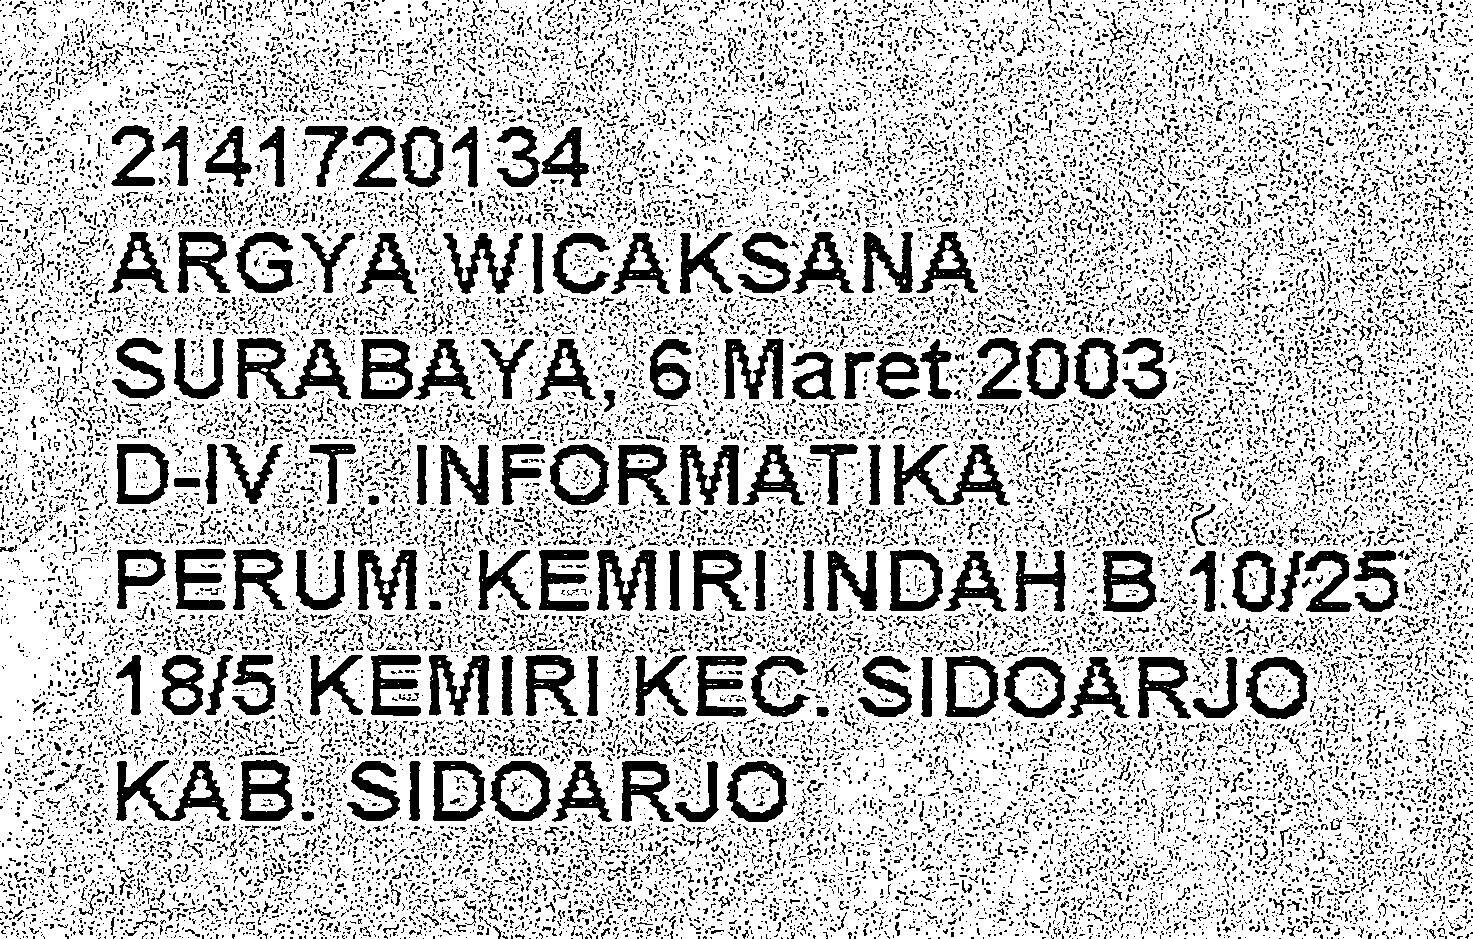

In [298]:
adaptive = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)
# check
cv2_imshow(adaptive)

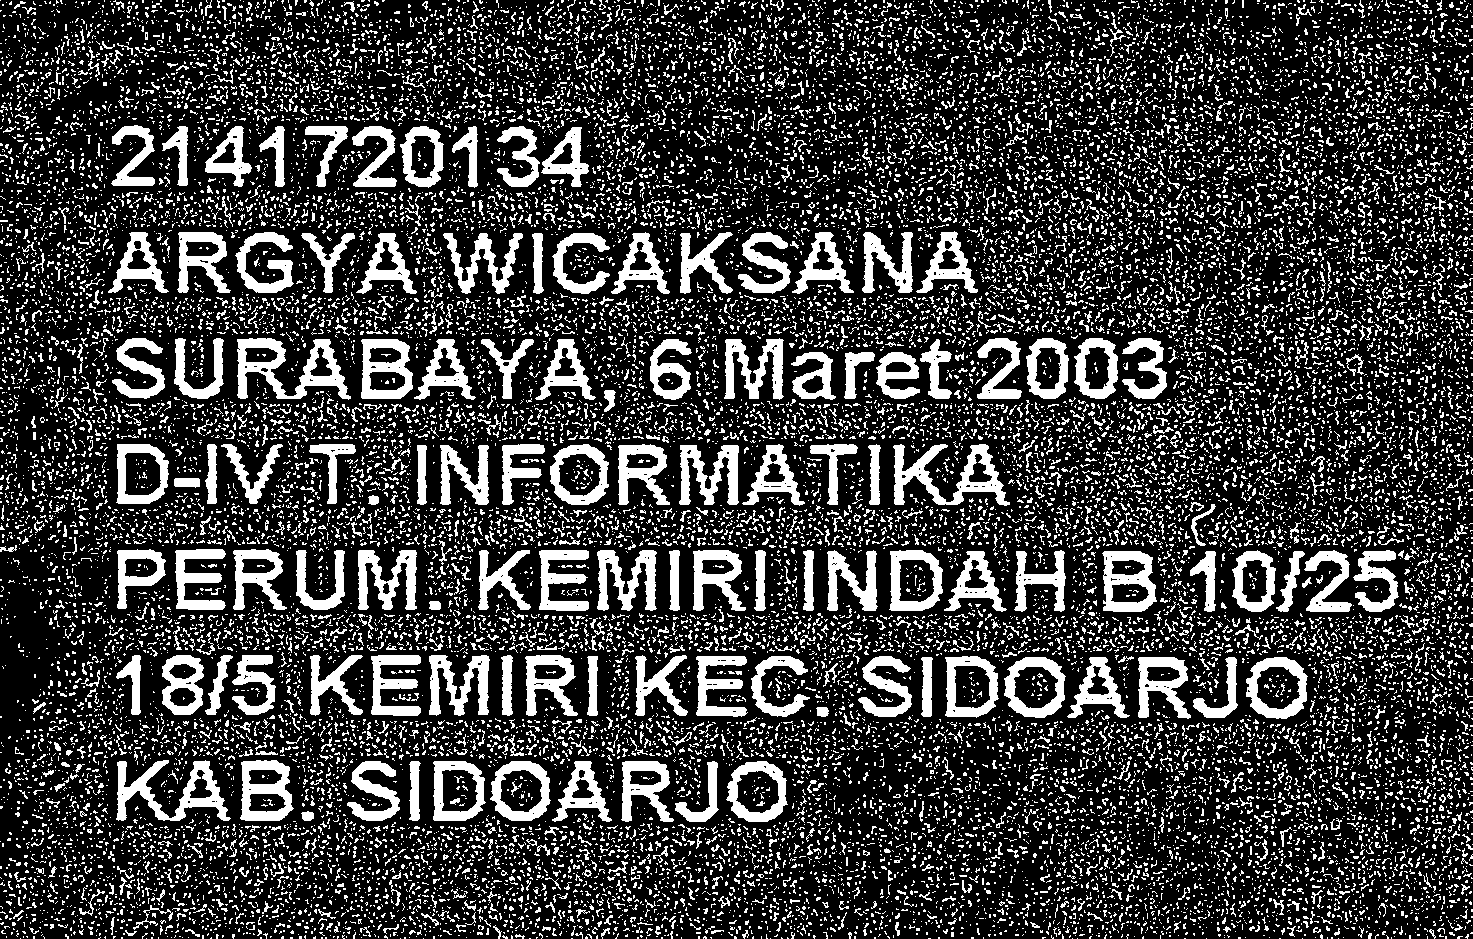

In [299]:
invertion = 255 - adaptive
# check
cv2_imshow(invertion)

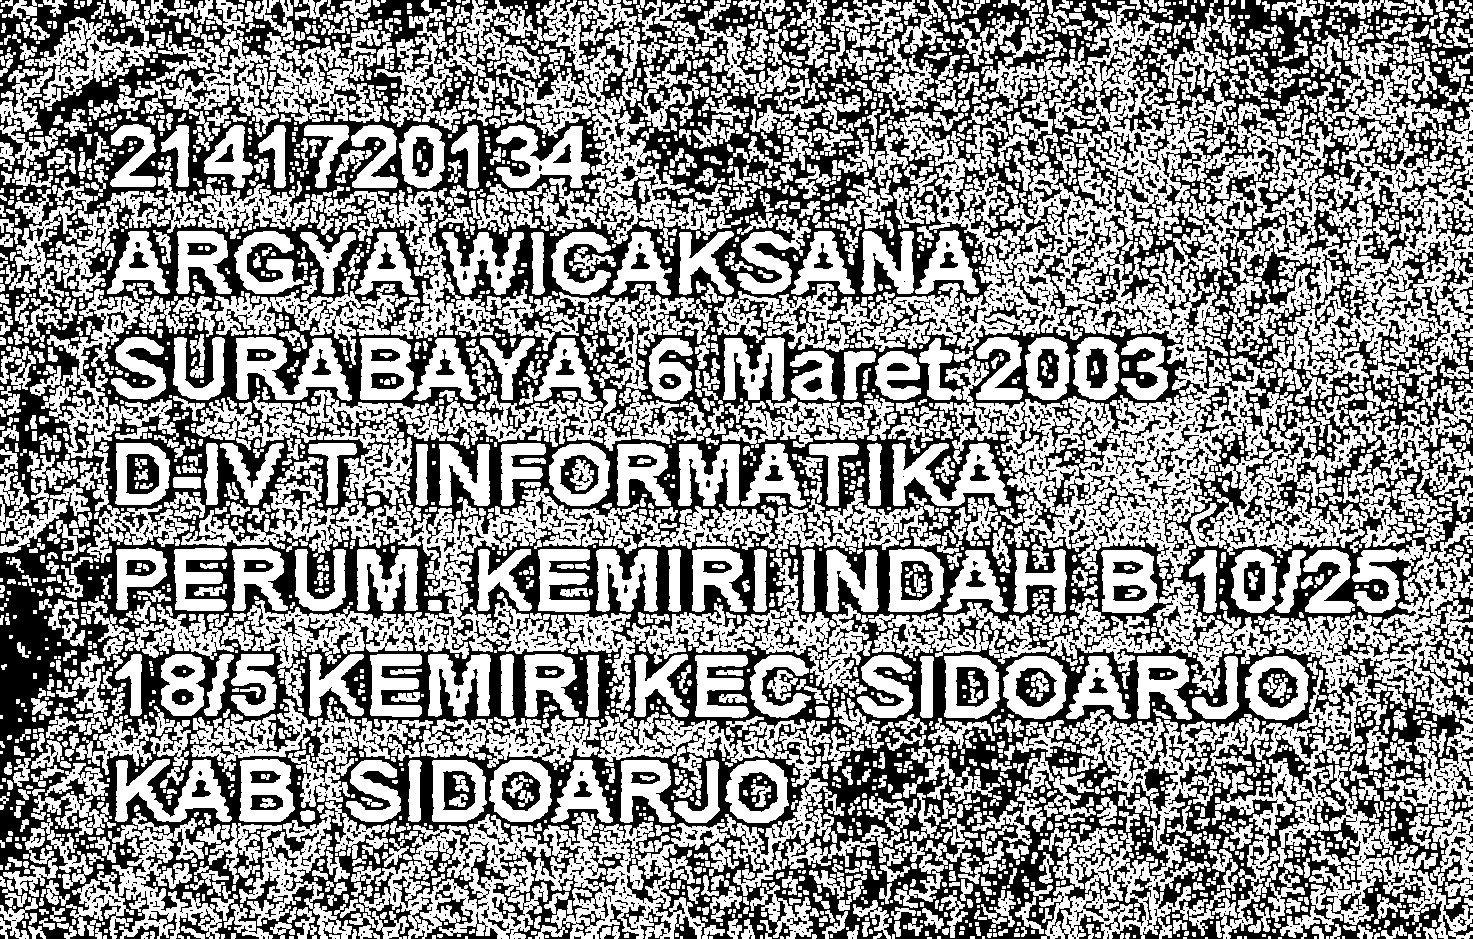

In [340]:
dilation = cv2.dilate(invertion, np.ones((3,3)))
# check
cv2_imshow(dilation)

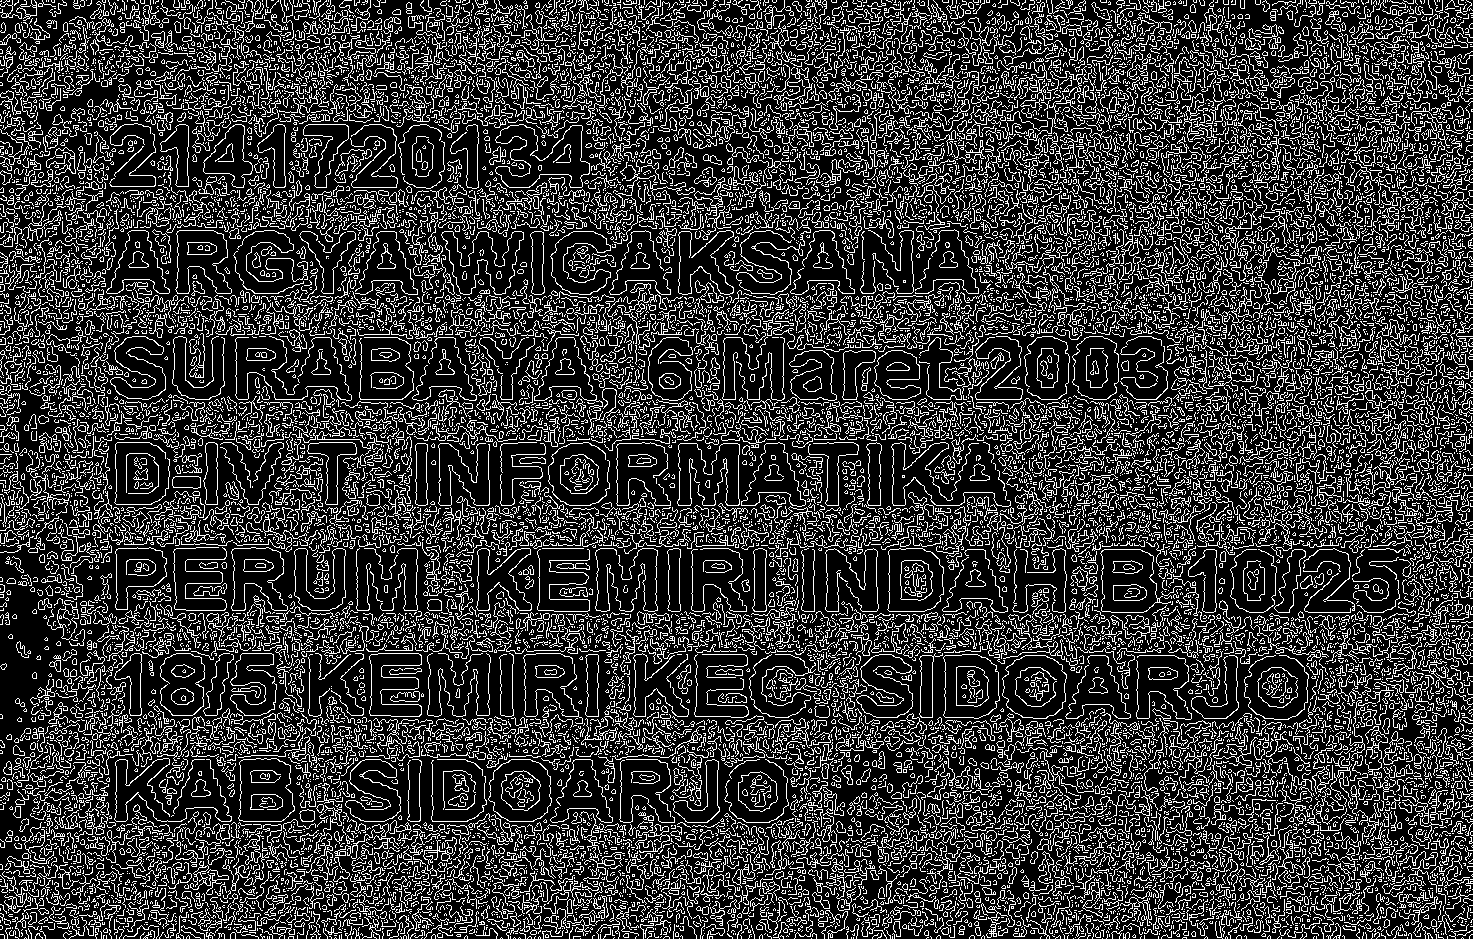

In [341]:
edges = cv2.Canny(dilation, 40, 150)
cv2_imshow(edges)

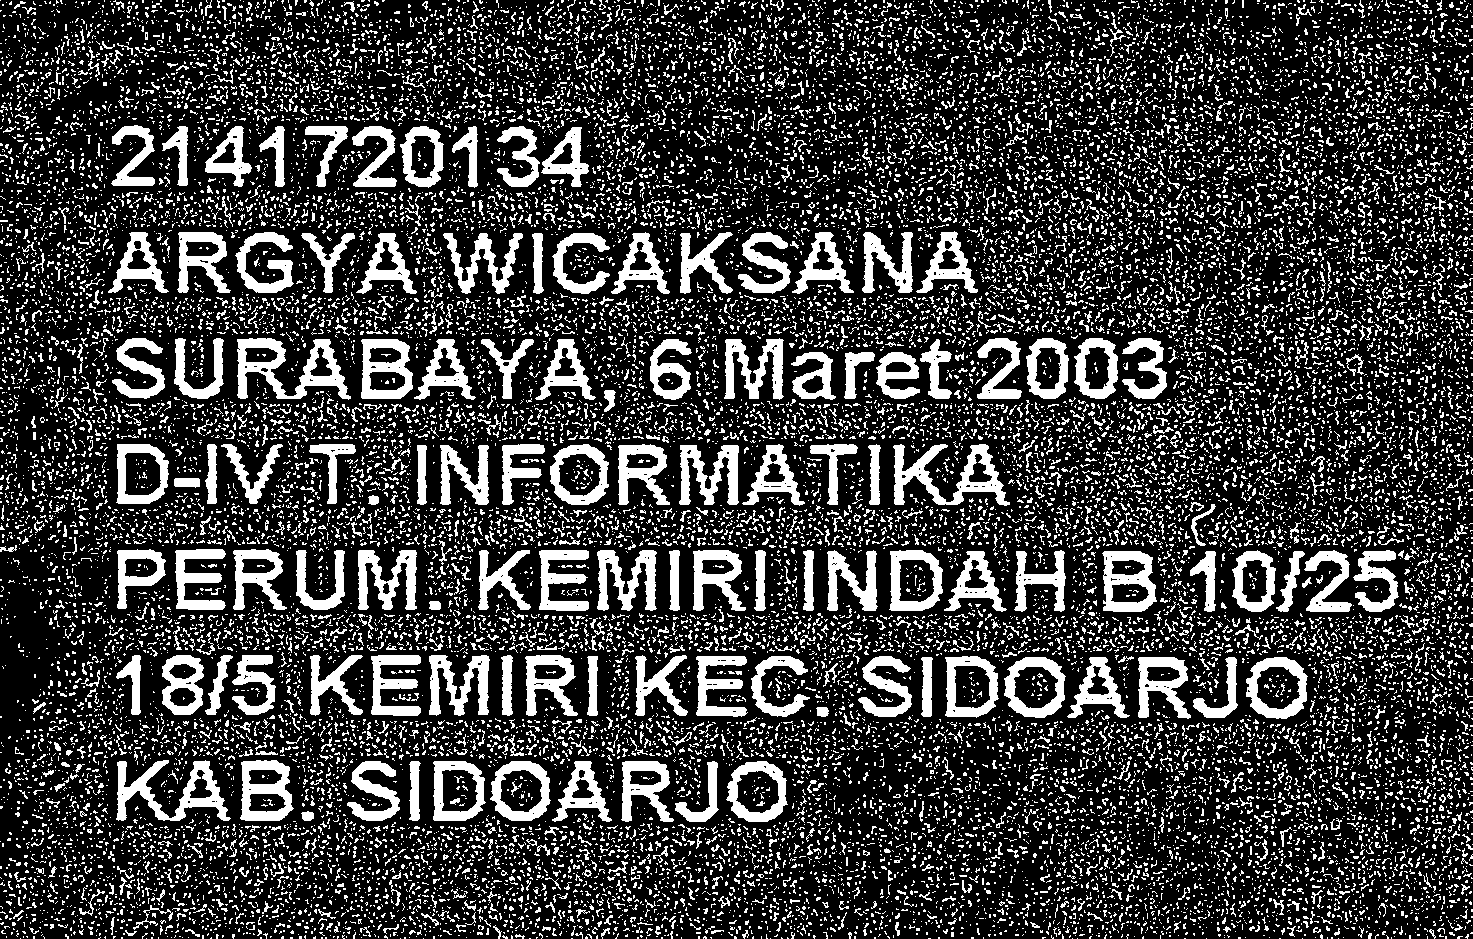

In [342]:
erode = cv2.erode(invertion, np.ones((1,1)))
cv2_imshow(erode)

In [343]:
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

In [356]:
conts = find_contours(erode.copy())


In [357]:
len(conts)

23251

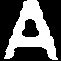

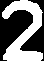

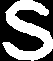

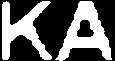

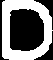

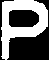

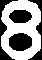

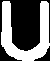

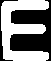

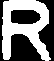

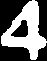

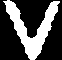

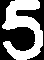

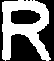

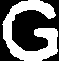

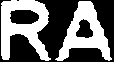

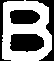

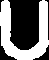

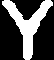

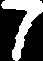

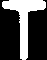

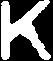

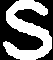

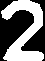

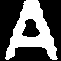

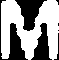

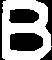

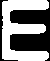

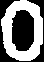

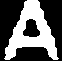

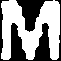

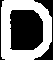

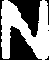

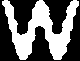

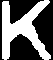

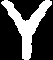

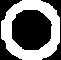

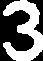

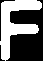

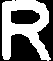

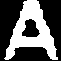

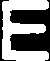

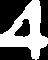

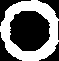

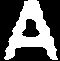

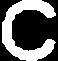

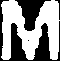

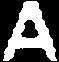

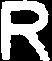

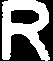

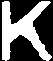

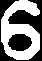

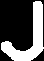

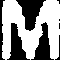

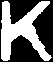

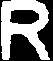

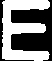

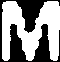

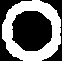

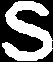

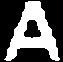

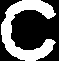

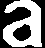

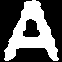

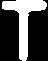

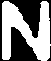

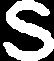

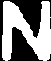

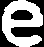

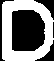

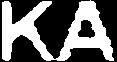

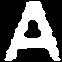

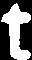

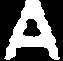

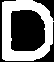

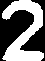

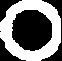

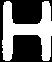

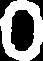

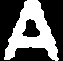

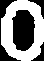

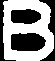

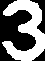

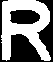

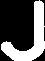

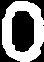

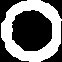

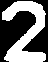

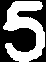

In [367]:
min_w, max_w = 30, 160
min_h, max_h = 34, 140
img_copy = img.copy() # original image for plotting countour result
filtered_conts = []

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    filtered_conts.append(c)
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)


In [368]:
def extract_roi(img):
  roi = img[y:y+h, x:x+w]

  return roi

def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

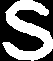

In [370]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(filtered_conts[2])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

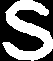

In [371]:
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

In [372]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [373]:
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

In [376]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [377]:
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 30, 160
  min_h, max_h = 34, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [378]:
detected_char[0][1]

(108, 232, 61, 61)

In [379]:
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [380]:
model = load_model('/content/manual_ocr.model')

In [381]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [382]:
preds = model.predict(pixels)

3/3 [==============================] - 0s 4ms/step


In [383]:
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

A 2 S K D P 8 U E R 4 V 5 R G R B U V T T K S 2 A H B E O A H D N W K V O 3 F R A E 4 O A C A A R R K 6 J H K R E H O S A C 2 A T N F S N 8 D K A 1 A D 2 O H 0 A 0 B 3 R J O 0 2 5 

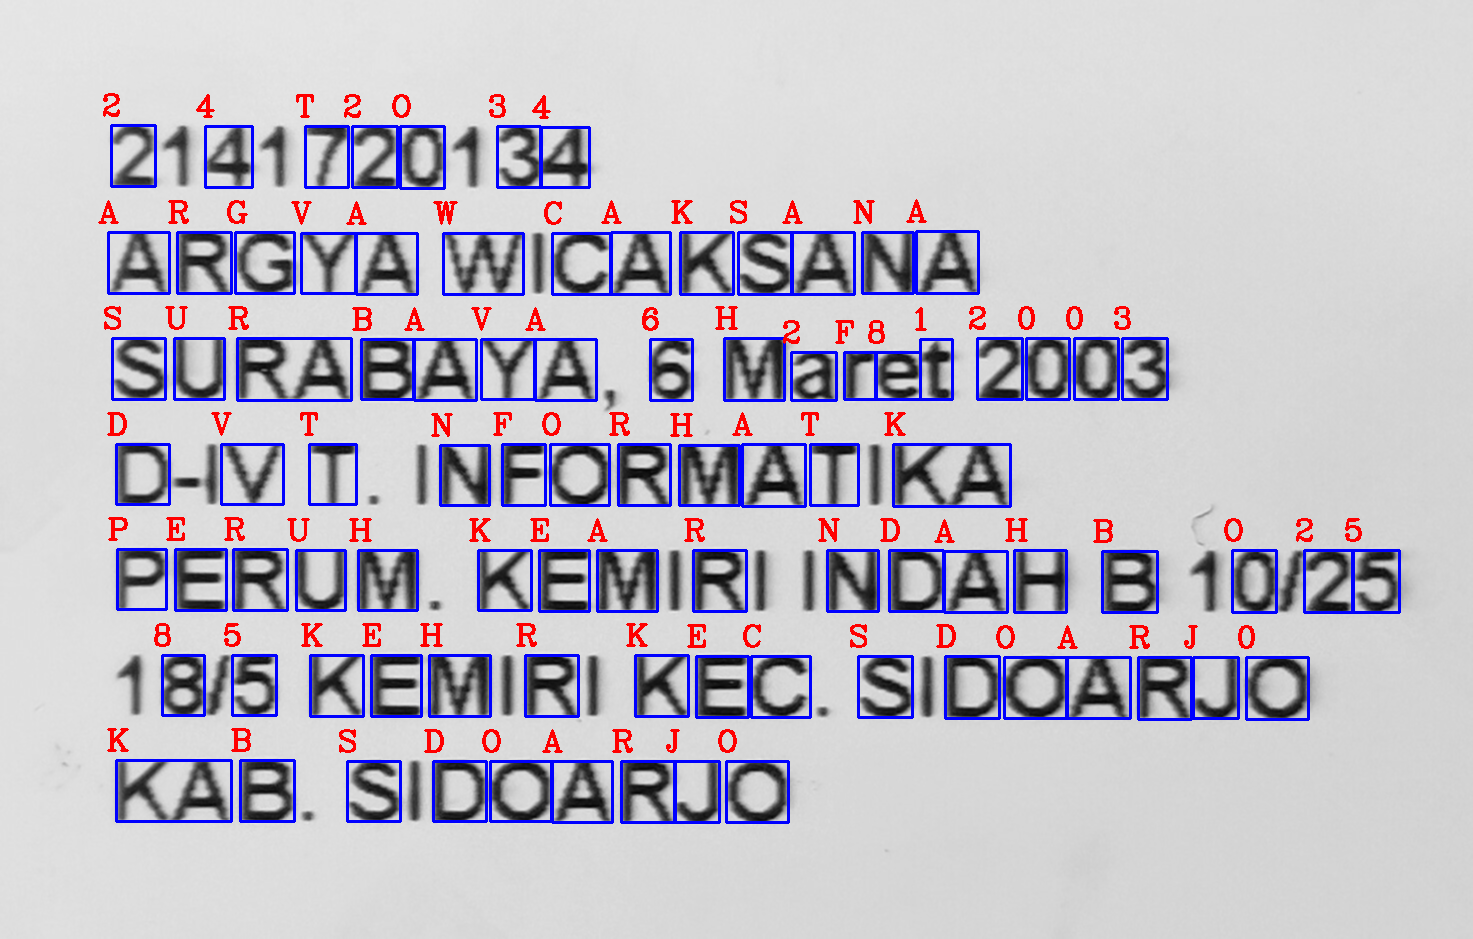

In [384]:
img_crop2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy)